In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

df['cabin_null'].mean()

0.7710437710437711

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [8]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [9]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [11]:
df['age_median']=df['Age'].fillna(df.Age.median())

In [12]:
df.head()

,Survived,Age,Fare,age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [13]:
print(df['Age'].std())
print(df['age_median'].std())

14.526497332334044
13.019696550973194


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

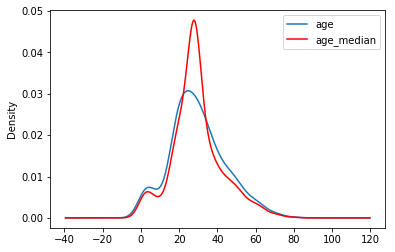

In [15]:
fig = plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, label='age')
df.age_median.plot(kind='kde', ax=ax, color='red', label='age_median')
ax.legend(loc='best')

In [16]:
df['age_random'] = df['Age']

In [17]:
random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum())

In [18]:
random_sample.index = df[df['Age'].isnull()].index
df.loc[df['Age'].isnull(), 'age_random'] = random_sample

In [19]:
df.head()

,Survived,Age,Fare,age_median,age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


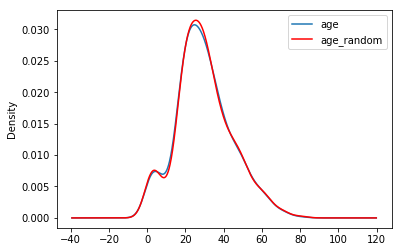

In [20]:
fig = plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, label='age')
df.age_random.plot(kind='kde', ax=ax, color='red', label='age_random')
ax.legend(loc='best')

In [21]:
df['age_nan'] = np.where(df['Age'].isnull(),1,0)

In [22]:
import seaborn as sns

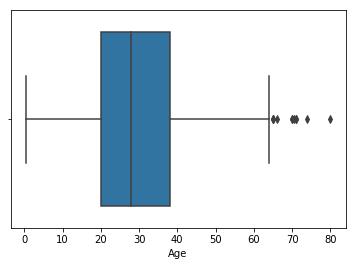

In [23]:
sns.boxplot('Age', data=df)

In [24]:
extreme=df.Age.mean()+3*df.Age.std()

In [25]:
extreme

73.27860964406095

In [26]:
df['age_end_distribution']=df['Age'].fillna(extreme)

In [27]:
df.isna().sum()

Survived                  0
Age                     177
Fare                      0
age_median                0
age_random                0
age_nan                   0
age_end_distribution      0
dtype: int64

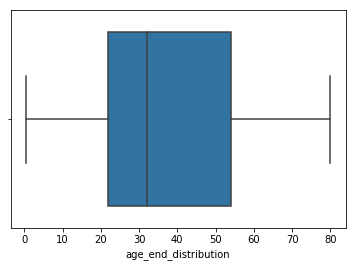

In [28]:
sns.boxplot('age_end_distribution', data=df)

In [29]:
df1 = pd.read_csv('train.csv')

In [30]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
df = pd.read_csv('train.csv', usecols=['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare' ])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [35]:
df.index=df.PassengerId

In [38]:
df['Age_given'] = np.where(df['Age'].isnull(),1,0)
df['Age'] = df['Age'].fillna(df.Age.median())

In [42]:
df['Sex'] = np.where(df['Sex']=='male',1,0)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Age_given
PassengerId,,,,,,,
1,1,0,3,1,22.0,7.2500,0
2,2,1,1,0,38.0,71.2833,0
3,3,1,3,0,26.0,7.9250,0
4,4,1,1,0,35.0,53.1000,0
5,5,0,3,1,35.0,8.0500,0


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression


In [47]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Age_given'], dtype='object')

In [49]:
X = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Age_given']]

In [50]:
X

,PassengerId,Pclass,Sex,Age,Fare,Age_given
PassengerId,,,,,,
1,1,3,1,22.0,7.2500,0
2,2,1,0,38.0,71.2833,0
3,3,3,0,26.0,7.9250,0
4,4,1,0,35.0,53.1000,0
5,5,3,1,35.0,8.0500,0
6,6,3,1,28.0,8.4583,1
7,7,1,1,54.0,51.8625,0
8,8,3,1,2.0,21.0750,0
9,9,3,0,27.0,11.1333,0


In [51]:
Y = df['Survived']

In [53]:
Y

PassengerId
1      0
2      1
3      1
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     1
13     0
14     0
15     0
16     1
17     0
18     1
19     0
20     1
21     0
22     1
23     1
24     1
25     0
26     1
27     0
28     0
29     1
30     0
      ..
862    0
863    1
864    0
865    0
866    1
867    1
868    0
869    0
870    1
871    0
872    1
873    0
874    0
875    1
876    1
877    0
878    0
879    0
880    1
881    1
882    0
883    0
884    0
885    0
886    0
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)

In [86]:
linreg = LinearRegression().fit(X_train, y_train)


In [87]:
from sklearn.metrics.regression import r2_score
score_train_linreg = r2_score(y_train, linreg.predict(X_train))


In [88]:
score_train_linreg

0.37759333980387544

In [89]:
score_test_linreg = r2_score(y_test, linreg.predict(X_test))

In [90]:
score_test_linreg

0.397375307798172

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Your code here
lr = LogisticRegression()
grid_values = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
    
grid_lr = GridSearchCV(lr, param_grid=grid_values, scoring='recall' )
grid_lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default s

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [92]:
print(grid_lr.best_params_)

{'C': 1, 'penalty': 'l1'}


In [93]:
grid_lr.best_score_

0.6705716474028687

In [94]:
lr = LogisticRegression(C=1, penalty='l1').fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
pred = lr.predict(X_test)

In [83]:
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [95]:
score_lr = r2_score(y_train, lr.predict(X_train))

In [96]:
score_lr

0.13484590659860096

In [97]:
score_lr_test = r2_score(y_test, lr.predict(X_test))

In [98]:
score_lr_test

0.06414868105515559

In [125]:
df = pd.read_csv('train.csv')

In [126]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df['Survived']

In [127]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [128]:
X['Age']=X['Age'].fillna(X.Age.median())
X['Embarked']=X['Embarked'].fillna(X['Embarked'].value_counts().index[0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [129]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X['Sex'] = encoder.fit_transform(X['Sex'])
X['Embarked'] = encoder.fit_transform(X['Embarked'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [131]:
from xgboost import XGBClassifier
classifier = XGBClassifier(colsample_bylevel= 0.9,
                    colsample_bytree = 0.8, 
                    gamma=0.99,
                    max_depth= 5,
                    min_child_weight= 1,
                    n_estimators= 10,
                    nthread= 4,
                    random_state= 2,
                    silent= True)
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

[16:13:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.7892376681614349

In [141]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
grid_values = {'n_estimators': [9,10,11,12], 'max_depth': [3,4,5]}
grid_rf = GridSearchCV(rf, param_grid=grid_values, scoring='roc_auc')
grid_rf.fit(X_train, y_train)
print('Model best parameter (max. AUC): ', grid_rf.best_params_)
print('Model score (AUC): ', grid_rf.best_score_)

Model best parameter (max. AUC):  {'max_depth': 5, 'n_estimators': 11}
Model score (AUC):  0.8783761130694214


In [143]:
rf = RandomForestRegressor(n_estimators=11, max_depth=5)
rf.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.7892376681614349

In [144]:
test_df = pd.read_csv('test.csv')
test_X = test_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]


In [145]:
test_X['Age'] = test_X['Age'].fillna(test_X['Age'].median())
test_X['Fare'] = test_X['Fare'].fillna(test_X['Fare'].median())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [147]:
test_X['Sex'] = encoder.fit_transform(test_X['Sex'])
test_X['Embarked'] = encoder.fit_transform(test_X['Embarked'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [151]:
prediction = classifier.predict(test_X)

In [152]:
output = pd.DataFrame({'PassengerId':test_df.PassengerId, 'Survived':prediction})

output.to_csv('submission.csv', index=False)


In [153]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
